In [1]:
import sys
import os
import pandas as pd
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [2]:
sys.path.append("../../")
sys.path.append("../")
from scale_rl.common.wandb_utils import *

/home/leehojoon/.pyenv/versions/3.9.5/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Collect Results

In [3]:
simba_v1_eval_df = pd.read_csv(
    "../results/sac_simba.csv",
    index_col=0
)
simba_v1_eval_df

,exp_name,env_name,seed,metric,env_step,value
0,sac_simba,dog_trot,4000,avg_return,0.0,10.229937
1,sac_simba,dog_trot,4000,avg_return,50000.0,64.202362
2,sac_simba,dog_trot,4000,avg_return,100000.0,148.874287
3,sac_simba,dog_trot,4000,avg_return,150000.0,258.045214
4,sac_simba,dog_trot,4000,avg_return,200000.0,336.314847
...,...,...,...,...,...,...
24485,sac_simba,humanoid_stand,500,avg_success,800000.0,0.000000
24486,sac_simba,humanoid_stand,500,avg_success,850000.0,0.000000
24487,sac_simba,humanoid_stand,500,avg_success,900000.0,0.000000
24488,sac_simba,humanoid_stand,500,avg_success,950000.0,0.000000


In [4]:
vmax_eval_df = pd.read_csv(
    "../results/1210_hypersimba_c101_vmax10.csv",
    index_col=0
)
vmax_eval_df

,exp_name,env_name,seed,metric,env_step,value
0,hypersimba_c101_rewnorm_gmax10,myo-pen-twirl-hard,4000,avg_return,0.0,-8.296103
1,hypersimba_c101_rewnorm_gmax10,myo-pen-twirl-hard,4000,avg_return,100000.0,602.620704
2,hypersimba_c101_rewnorm_gmax10,myo-pen-twirl-hard,4000,avg_return,200000.0,978.961290
3,hypersimba_c101_rewnorm_gmax10,myo-pen-twirl-hard,4000,avg_return,300000.0,670.050119
4,hypersimba_c101_rewnorm_gmax10,myo-pen-twirl-hard,4000,avg_return,400000.0,1786.636542
...,...,...,...,...,...,...
9355,hypersimba_c101_rewnorm_gmax10,h1-walk-v0,0,avg_success,600000.0,0.000000
9356,hypersimba_c101_rewnorm_gmax10,h1-walk-v0,0,avg_success,700000.0,0.000000
9357,hypersimba_c101_rewnorm_gmax10,h1-walk-v0,0,avg_success,800000.0,0.000000
9358,hypersimba_c101_rewnorm_gmax10,h1-walk-v0,0,avg_success,900000.0,0.000000


In [5]:
entity = 'draftrec'
project_name = 'HyperSimba_2412'
run_exp_names_to_analysis_exp_names = {
    'c101_gmax5': '1214_hypersimba_gmax5',
    'gmax5_lr1e4_5e5': '1214_hypersimba_gmax5_lr1e4_5e5',
}
run_exp_names = list(run_exp_names_to_analysis_exp_names.keys())
metrics = ['avg_return', 'avg_success']

In [6]:
runs = collect_runs(entity=entity, project_name=project_name) 
filtered_runs = filter_runs(runs, exp_names = run_exp_names)
wandb_df = convert_runs_to_dataframe(
    runs = filtered_runs, 
    run_exp_name_to_analysis_exp_name=run_exp_names_to_analysis_exp_names
)
wandb_df = wandb_df[wandb_df.apply(lambda row: 'finished' in str(row['run']), axis=1)]
gmax_eval_df = convert_wandb_df_to_eval_df(wandb_df, metrics)
gmax_eval_df

100%|██████████| 430/430 [03:19<00:00,  2.16it/s]


,exp_name,env_name,seed,metric,env_step,value
0,1214_hypersimba_gmax5_lr1e4_5e5,myo-pen-twirl-hard,4000,avg_return,0.0,-1.938178
1,1214_hypersimba_gmax5_lr1e4_5e5,myo-pen-twirl-hard,4000,avg_return,100000.0,366.602390
2,1214_hypersimba_gmax5_lr1e4_5e5,myo-pen-twirl-hard,4000,avg_return,200000.0,1356.308044
3,1214_hypersimba_gmax5_lr1e4_5e5,myo-pen-twirl-hard,4000,avg_return,300000.0,1477.899961
4,1214_hypersimba_gmax5_lr1e4_5e5,myo-pen-twirl-hard,4000,avg_return,400000.0,1680.756845
...,...,...,...,...,...,...
10455,1214_hypersimba_gmax5,acrobot-swingup,0,avg_success,600000.0,0.000000
10456,1214_hypersimba_gmax5,acrobot-swingup,0,avg_success,700000.0,0.000000
10457,1214_hypersimba_gmax5,acrobot-swingup,0,avg_success,800000.0,0.000000
10458,1214_hypersimba_gmax5,acrobot-swingup,0,avg_success,900000.0,0.000000


In [7]:
eval_df = pd.concat([simba_v1_eval_df, gmax_eval_df, vmax_eval_df])

In [11]:
exp_names = eval_df['exp_name'].unique()
exp_names

array(['sac_simba', '1214_hypersimba_gmax5_lr1e4_5e5',
       '1214_hypersimba_gmax5', 'hypersimba_c101_rewnorm_gmax10',
       'hypersimba_c101_rewnorm_gmax10_no_cdq',
       'hypersimba_c101_rewnorm_gmax10_cdq'], dtype=object)

#### Visualize Results

In [12]:
from rliable import library as rly
from rliable import metrics as rly_metrics
from rliable import plot_utils as rly_plot_utils

aggregate_func = lambda x: np.array([
  rly_metrics.aggregate_iqm(x),
  rly_metrics.aggregate_median(x),
  rly_metrics.aggregate_mean(x),
  rly_metrics.aggregate_optimality_gap(x/1000)])

In [27]:
MUJOCO_TD3_SCORE = {
    "HalfCheetah_v4":10574,
    "Hopper_v4":3226,
    "Walker2d_v4":3946,
    "Ant_v4":3942,
    "Humanoid_v4":5165,
}

MUJOCO_RANDOM_SCORE = {
    "HalfCheetah_v4":-289.415,
    "Hopper_v4":18.791,
    "Walker2d_v4":2.791,
    "Ant_v4":-70.288,
    "Humanoid_v4":120.423,
}

HB_SUCCESS_SCORE = {
    "h1_walk_v0": 700.0,
    "h1_stand_v0": 800.0,
    "h1_run_v0": 700.0,
    "h1_reach_v0": 12000.0,
    "h1_hurdle_v0": 700.0,
    "h1_crawl_v0": 700.0,
    "h1_maze_v0": 1200.0,
    "h1_sit_simple_v0": 750.0,
    "h1_sit_hard_v0": 750.0,
    "h1_balance_simple_v0": 800.0,
    "h1_balance_hard_v0": 800.0,
    "h1_stair_v0": 700.0,
    "h1_slide_v0": 700.0,
    "h1_pole_v0": 700.0,
    "h1_push_v0": 700.0,
    "h1_cabinet_v0": 2500.0,
    "h1_highbar_v0": 750.0,
    "h1_door_v0": 600.0,
    "h1_truck_v0": 3000.0,
    "h1_cube_v0": 370.0,
    "h1_bookshelf_simple_v0": 2000.0,
    "h1_bookshelf_hard_v0": 2000.0,
    "h1_basketball_v0": 1200.0,
    "h1_window_v0": 650.0,
    "h1_spoon_v0": 650.0,
    "h1_kitchen_v0": 4.0,
    "h1_package_v0": 1500.0,
    "h1_powerlift_v0": 800.0,
    "h1_room_v0": 400.0,
    "h1_insert_small_v0": 350.0,
    "h1_insert_normal_v0": 350.0,
}

# needs to be updated
HB_RANDOM_SCORE = {
    "h1_walk_v0": 0.0,
    "h1_stand_v0": 0.0,
    "h1_run_v0": 0.0,
    "h1_reach_v0": 0.0,
    "h1_hurdle_v0": 0.0,
    "h1_crawl_v0": 0.0,
    "h1_maze_v0": 0.0,
    "h1_sit_simple_v0": 0.0,
    "h1_sit_hard_v0": 0.0,
    "h1_balance_simple_v0": 0.0,
    "h1_balance_hard_v0": 0.0,
    "h1_stair_v0": 0.0,
    "h1_slide_v0": 0.0,
    "h1_pole_v0": 0.0,
    "h1_push_v0": 0.0,
    "h1_cabinet_v0": 0.0,
    "h1_highbar_v0": 0.0,
    "h1_door_v0": 0.0,
    "h1_truck_v0": 0.0,
    "h1_cube_v0": 0.0,
    "h1_bookshelf_simple_v0": 0.0,
    "h1_bookshelf_hard_v0": 0.0,
    "h1_basketball_v0": 0.0,
    "h1_window_v0": 0.0,
    "h1_spoon_v0": 0.0,
    "h1_kitchen_v0": 0.0,
    "h1_package_v0": 0.0,
    "h1_powerlift_v0": 0.0,
    "h1_room_v0": 0.0,
    "h1_insert_small_v0": 0.0,
    "h1_insert_normal_v0": 0.0,
}

def normalize_values(df, random_score_dict, base_score_dict):
    """
    Normalize the 'value' column in the DataFrame based on the random_score and base_score.

    Args:
    - df (pandas.DataFrame): Input DataFrame with columns 'env_name' and 'value'

    Returns:
    - pandas.DataFrame: DataFrame with normalized 'value' column
    """
    # Create a copy of the DataFrame to avoid modifying the original
    df_normalized = df.copy()

    # Define a function to normalize a single value
    def normalize_value(row):
        env_name = row["env_name"]
        value = row["value"]
        base_score = base_score_dict[env_name]
        random_score = random_score_dict[env_name]

        return (value - random_score) / (base_score - random_score)

    # Apply the normalization function to each row
    df_normalized["value"] = df_normalized.apply(normalize_value, axis=1)

    return df_normalized


In [18]:
from scale_rl.envs.mujoco import MUJOCO_ALL
from scale_rl.envs.dmc import DMC_EASY_MEDIUM, DMC_HARD
from scale_rl.envs.humanoid_bench import HB_LOCOMOTION_NOHAND
from scale_rl.envs.myosuite import MYOSUITE_TASKS

In [19]:
def replace_hypen_to_underbar(env_name_list):
    for idx in range(len(env_name_list)):
        env_name_list[idx] = env_name_list[idx].replace('-', '_')
    return env_name_list

MUJOCO_ALL = replace_hypen_to_underbar(MUJOCO_ALL)
DMC_EM = replace_hypen_to_underbar(DMC_EASY_MEDIUM)
DMC_HARD = replace_hypen_to_underbar(DMC_HARD)
MYOSUITE_TASKS = replace_hypen_to_underbar(MYOSUITE_TASKS)
HB_LOCOMOTION_NOHAND = replace_hypen_to_underbar(HB_LOCOMOTION_NOHAND)
eval_df['env_name'] = eval_df['env_name'].str.replace('-', '_')
eval_df

,exp_name,env_name,seed,metric,env_step,value
0,sac_simba,dog_trot,4000,avg_return,0.0,10.229937
1,sac_simba,dog_trot,4000,avg_return,50000.0,64.202362
2,sac_simba,dog_trot,4000,avg_return,100000.0,148.874287
3,sac_simba,dog_trot,4000,avg_return,150000.0,258.045214
4,sac_simba,dog_trot,4000,avg_return,200000.0,336.314847
...,...,...,...,...,...,...
9355,hypersimba_c101_rewnorm_gmax10,h1_walk_v0,0,avg_success,600000.0,0.000000
9356,hypersimba_c101_rewnorm_gmax10,h1_walk_v0,0,avg_success,700000.0,0.000000
9357,hypersimba_c101_rewnorm_gmax10,h1_walk_v0,0,avg_success,800000.0,0.000000
9358,hypersimba_c101_rewnorm_gmax10,h1_walk_v0,0,avg_success,900000.0,0.000000


In [20]:
DMC_EM = DMC_EM + ['ball_in_cup_catch']

In [21]:
#cur_exp_names = ['sac_simba', 'rr2_hypersphere_shift3']
cur_exp_names = ['1214_hypersimba_gmax5_lr1e4_5e5', '1214_hypersimba_gmax5']

#eval_df['exp_name'].unique()

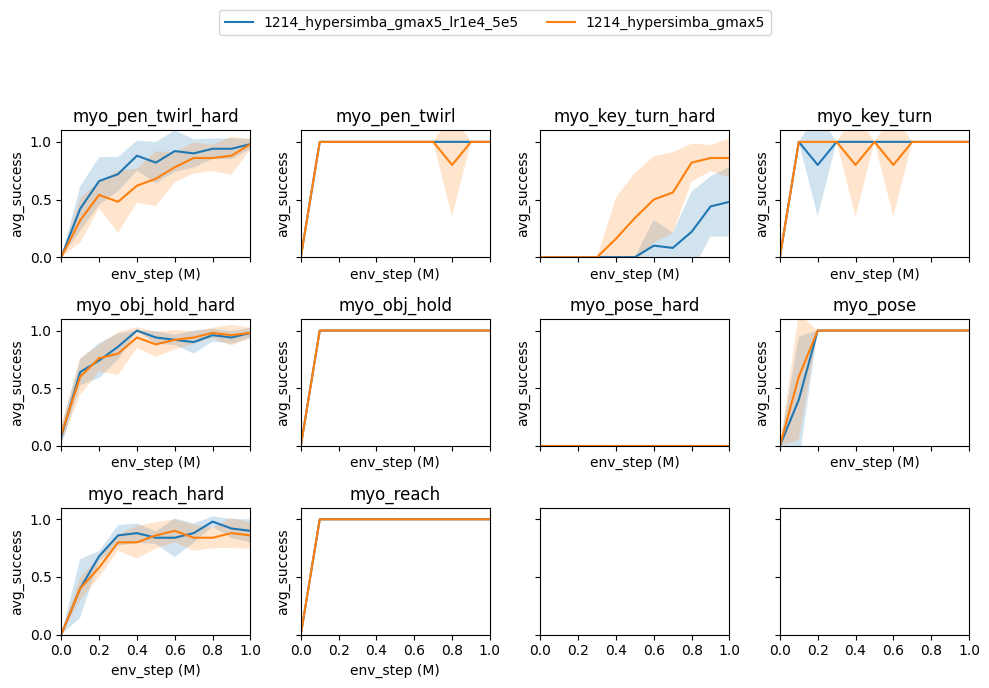

In [57]:
metric_matrix_dict = None

for env_type in ['MYOSUITE']: #, 'DMC_HARD', 'MYOSUITE']:
    if env_type == 'MUJOCO_ALL':
        env_list = MUJOCO_ALL
        env_step = 1e6
        metric_type = 'avg_return'
        plot_height=4 # 4
        y_lim_max=2.0

    elif env_type == 'DMC_EM':
        env_list = DMC_EM
        env_step = 1e6
        metric_type = 'avg_return'
        plot_height=8 # 4
        y_lim_max=1.1

    elif env_type == 'DMC_HARD':
        env_list = DMC_HARD
        env_step = 1e6
        metric_type = 'avg_return'
        plot_height=4 # 2.5
        y_lim_max=1.1

    elif env_type == 'MYOSUITE':
        env_list = MYOSUITE_TASKS
        env_step = 1e6
        metric_type = 'avg_success'
        plot_height=6 # 2.5
        y_lim_max=1.1

    elif env_type == 'HB_LOCOMOTION_NOHAND':
        env_list = HB_LOCOMOTION_NOHAND
        env_step = 1e6
        metric_type = 'avg_return'
        plot_height=6 # 2.5
        y_lim_max=1.5

    _eval_df = eval_df[eval_df['env_name'].isin(env_list)]
    _eval_df = _eval_df[_eval_df['exp_name'].isin(cur_exp_names)]

    if env_type == 'MUJOCO_ALL':
        _eval_df = normalize_values(_eval_df, MUJOCO_RANDOM_SCORE, MUJOCO_TD3_SCORE)

    if env_type == 'HB_LOCOMOTION_NOHAND':
        _eval_df = normalize_values(_eval_df, HB_RANDOM_SCORE, HB_SUCCESS_SCORE)

    # to match the scale of success to the return in comparison
    if env_type in ['DMC_EM', 'DMC_HARD']:
        _eval_df.loc[:, 'value'] /= 1000.0

    plot_metric_history_per_env(
        _eval_df,
        num_plots_per_row=4,
        metric=metric_type,
        x_lim_max=env_step,
        y_lim_max=y_lim_max,
        plot_width=10,
        plot_height=plot_height,
        y_label=metric_type,
    )

    _metric_matrix_dict = generate_metric_matrix_dict(
        _eval_df, 
        env_step=env_step,
        metric_type=metric_type,
    )

    if metric_matrix_dict is None:
        metric_matrix_dict = _metric_matrix_dict
    else:
        for key, arr2 in _metric_matrix_dict.items(): 
            if key in metric_matrix_dict: 
                arr1 = metric_matrix_dict[key] 
                min_cols = min(arr1.shape[1], arr2.shape[1]) 
                metric_matrix_dict[key] = np.concatenate( 
                    (arr1[:, :min_cols], arr2[:, :min_cols]), axis=0 
                ) 
            else: 
                metric_matrix_dict[key] = arr2.copy()

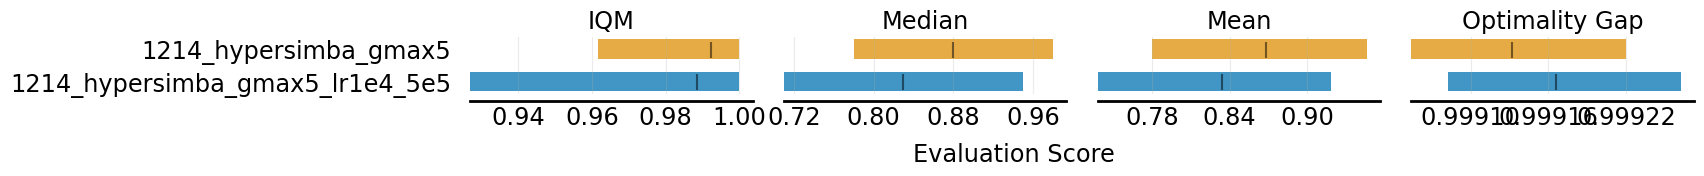

In [58]:
aggregate_scores, aggregate_score_cis = rly.get_interval_estimates(
    metric_matrix_dict, aggregate_func, reps=10000)

fig, axes = rly_plot_utils.plot_interval_estimates(
    aggregate_scores, aggregate_score_cis,
    metric_names=['IQM', 'Median', 'Mean', 'Optimality Gap'],
    algorithms=cur_exp_names,
    xlabel_y_coordinate=-0.8,
    xlabel='Evaluation Score',
)

In [56]:
aggregate_scores

{'1214_hypersimba_gmax5_lr1e4_5e5': array([1.59120508, 1.59059727, 1.58485673, 0.99841514]),
 '1214_hypersimba_gmax5': array([1.46133645, 1.48826842, 1.42960537, 0.99857039])}